In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pt
import requests

plt.style.use('fivethirtyeight')
pallet = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

In [2]:
fred_key = "87fa90f87082a0327a0a7afa2cb056e9"
fred = Fred(api_key=fred_key)

In [ ]:
result = fred.search('S&P', order_by='popularity')
result.head()

<AxesSubplot:title={'center':'S&P500'}>

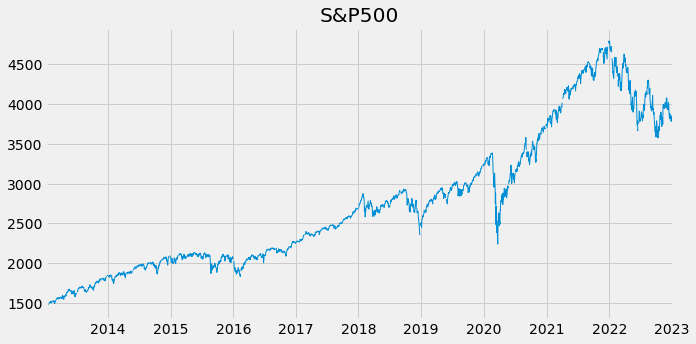

In [6]:
sp500 = fred.get_series('SP500')
sp500.plot(figsize=(10,5),title='S&P500',lw=1)

In [20]:
unemployment = fred.search('unemployment rate state',filter=('frequency','Monthly'))
df = unemployment.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
df = df.loc[df['title'].str.contains('Unemployment Rate')]

In [23]:
results = []
for id in df.index:
    result = fred.get_series(series_id=id)
    results.append(result.to_frame(name=id))

In [28]:
pd.concat(results, axis=1)

,NYUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.2
1976-04-01,10.2
1976-05-01,10.1
...,...
2022-07-01,4.3
2022-08-01,4.7
2022-09-01,4.3
2022-10-01,4.3
